In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("comment.csv")

In [ ]:
df.head()

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


In [ ]:
df["Sentiment"].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [ ]:
df["Sentiment"].value_counts()

,count
Sentiment,
positive,11432
neutral,4638
negative,2338


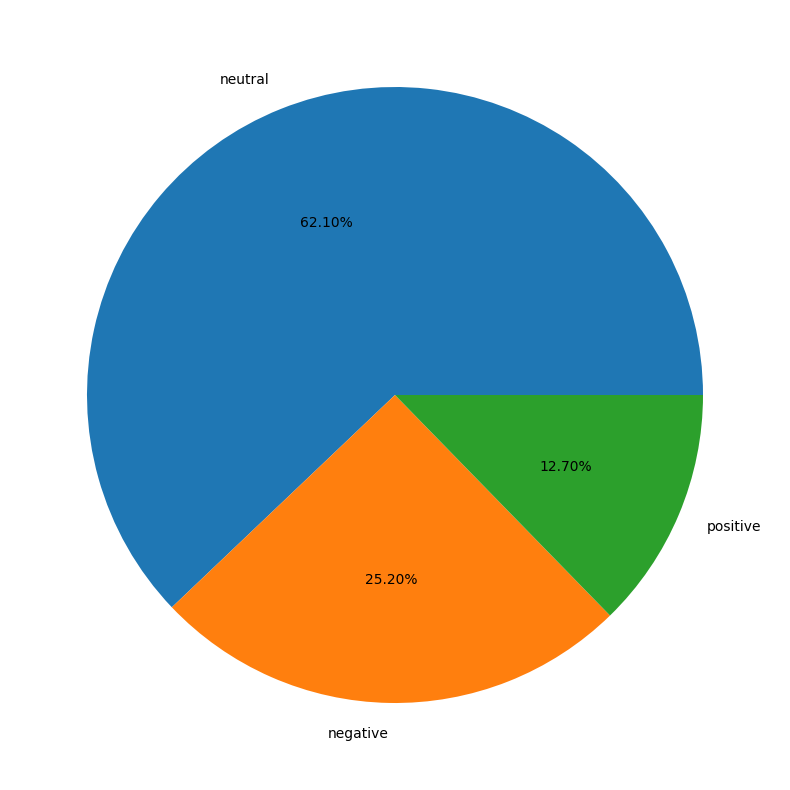

In [ ]:
count=df["Sentiment"].value_counts()
label=df["Sentiment"].unique()
plt.figure(figsize=(10,10))
plt.pie(count,labels=label,autopct="%0.2f%%")
plt.show()


In [ ]:
import re
import pandas as pd

def cleanResume(txt):

    txt = str(txt)
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText


df["Comment"] = df["Comment"].apply(lambda x: cleanResume(x))

In [ ]:
sentiment_mapping={
    'negative':0,
    'neutral':1,
    'positive':2
}
df["Sentiment"]=df["Sentiment"].map(sentiment_mapping)

In [ ]:
df.head()

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,1
1,here in nz 50 of retailers don t even have con...,0
2,i will forever acknowledge this channel with t...,2
3,whenever i go to a place that doesn t take app...,0
4,apple pay is so convenient secure and easy to ...,2


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
tf=TfidfVectorizer(stop_words="english")
tf.fit(df["Comment"])
features=tf.transform(df["Comment"])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(features,df["Sentiment"],test_size=0.2,random_state=42)

In [ ]:
X_train.shape,Y_train.shape

((14726, 36462), (14726,))

In [ ]:
X_train[0]

<1x36462 sparse matrix of type '<class 'numpy.float64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [ ]:
X_train = X_train.toarray() if hasattr(X_train, 'toarray') else X_train
X_test = X_test.toarray() if hasattr(X_test, 'toarray') else X_test

In [ ]:
X_train[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
model=Sequential()
model.add(Dense(16,activation="relu",input_shape=(X_train.shape[1],), kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(32,activation="linear"))
model.add(Dropout(0.3))
model.add(Dense(3,activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
model.fit(X_train,Y_train,epochs=10,batch_size=32,validation_data=(X_test,Y_test))

Epoch 1/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.6177 - loss: 0.9421 - val_accuracy: 0.6763 - val_loss: 0.8029
Epoch 2/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7194 - loss: 0.7836 - val_accuracy: 0.7156 - val_loss: 0.8156
Epoch 3/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7555 - loss: 0.7531 - val_accuracy: 0.7097 - val_loss: 0.8454
Epoch 4/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7802 - loss: 0.7203 - val_accuracy: 0.7116 - val_loss: 0.8686
Epoch 5/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7857 - loss: 0.7182 - val_accuracy: 0.7075 - val_loss: 0.9024
Epoch 6/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7920 - loss: 0.7054 - val_accuracy: 0.7048 - val_loss: 0.9400
Epoch 7/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7961 - loss: 0.7039 - val_accuracy: 0.7021 - val_loss: 0.9343
Epoch 8/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8086 - loss: 0.6885 - val_accuracy: 

In [ ]:
loss,accuracy=model.evaluate(X_test,Y_test,verbose=0)
print(f"loss : {loss} accuracy : {accuracy}")

In [ ]:
import numpy as np
def predict(input):
  input=cleanResume(input)
  vectorized_text=tf.transform([input])
  text=vectorized_text.toarray()
  prediction=model.predict([text])
  val=np.argmax(prediction)
  if val==0:
    print("negative")
  elif val==1:
    print("neutral")
  elif val==2:
    print("positive")

In [ ]:
predict("Bro u rocked it,too good")